<a href="https://colab.research.google.com/github/sdikici/Demand_Forecasting_Prophet_DeepAR/blob/main/Prophet_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [2]:
!kaggle datasets download -d sercandikici/merged-dataset-electricty-weather-for-modelling
! unzip merged-dataset-electricty-weather-for-modelling.zip

  0% 0.00/104k [00:00<?, ?B/s]
100% 104k/104k [00:00<00:00, 72.7MB/s]
Archive:  merged-dataset-electricty-weather-for-modelling.zip
  inflating: merged_data.csv         


In [3]:
from prophet import Prophet
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true))
    return mape

def root_mean_squared_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    mse = np.mean((y_true - y_pred) ** 2)
    rmse = np.sqrt(mse)
    return rmse

def r_squared(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    mean_y_true = np.mean(y_true)
    ss_total = np.sum((y_true - mean_y_true) ** 2)
    ss_residual = np.sum((y_true - y_pred) ** 2)
    r2 = 1 - (ss_residual / ss_total)
    return r2


In [5]:
df_merged = pd.read_csv("merged_data.csv")
df_merged['settlement_date'] = pd.to_datetime(df_merged['settlement_date'])
df_merged

,settlement_date,tsd,is_holiday,temp
0,2021-01-01 00:00:00,28552.00,1.0,1.55
1,2021-01-01 02:00:00,26579.75,1.0,1.60
2,2021-01-01 04:00:00,25236.00,1.0,0.55
3,2021-01-01 06:00:00,25792.25,1.0,-0.35
4,2021-01-01 08:00:00,28162.75,1.0,-0.10
...,...,...,...,...
13136,2023-12-31 16:00:00,34006.00,0.0,7.60
13137,2023-12-31 18:00:00,32273.00,0.0,8.20
13138,2023-12-31 20:00:00,27456.50,0.0,8.45
13139,2023-12-31 22:00:00,24139.25,0.0,8.35


Model 1 predict 7 days in the future

In [6]:
df_model_1 = df_merged[["tsd","settlement_date"]]
df_model_1.columns=["y","ds"]
df_model_1

,y,ds
0,28552.00,2021-01-01 00:00:00
1,26579.75,2021-01-01 02:00:00
2,25236.00,2021-01-01 04:00:00
3,25792.25,2021-01-01 06:00:00
4,28162.75,2021-01-01 08:00:00
...,...,...
13136,34006.00,2023-12-31 16:00:00
13137,32273.00,2023-12-31 18:00:00
13138,27456.50,2023-12-31 20:00:00
13139,24139.25,2023-12-31 22:00:00


train test split

In [7]:
split_from = 90*12 #train test split is from 90days

train_data = df_model_1[:-split_from]
test_data = df_model_1[-split_from:]
print(train_data.shape)
print(test_data.shape)

(12061, 2)
(1080, 2)


In [8]:
test_data

,y,ds
12061,21072.25,2023-10-03 02:00:00
12062,21265.25,2023-10-03 04:00:00
12063,25727.25,2023-10-03 06:00:00
12064,28366.25,2023-10-03 08:00:00
12065,26361.75,2023-10-03 10:00:00
...,...,...
13136,34006.00,2023-12-31 16:00:00
13137,32273.00,2023-12-31 18:00:00
13138,27456.50,2023-12-31 20:00:00
13139,24139.25,2023-12-31 22:00:00


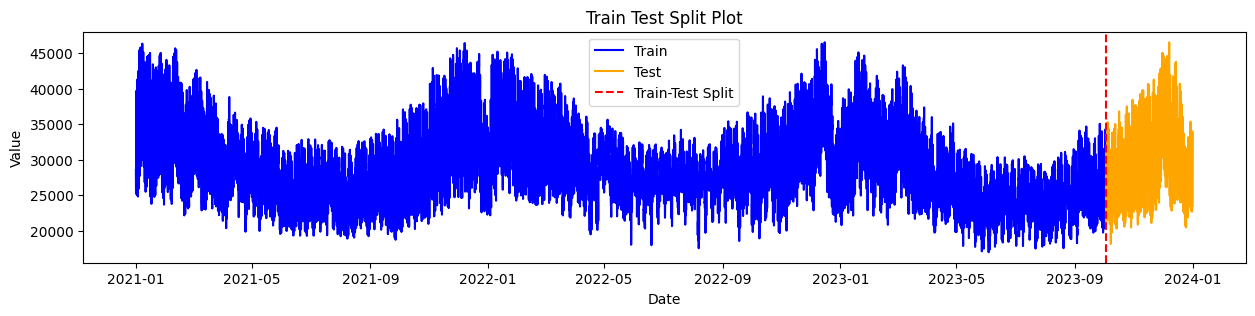

In [9]:
plt.figure(figsize=(15,3))
plt.plot(train_data["ds"],train_data["y"],color="blue", label="Train")
plt.plot(test_data["ds"],test_data["y"], color="orange", label="Test")
plt.axvline(test_data.iloc[0]['ds'], color="red", linestyle="--", label="Train-Test Split")

plt.title('Train Test Split Plot')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

train parameters

In [10]:
freq = "2H"
seasonality_prior_scale = 0.01
changepoint_prior_scale = 0.05
days_to_predict=90
periods = days_to_predict*12
mcmc_samples = 50

Train the model

In [11]:
m = Prophet(mcmc_samples=mcmc_samples, changepoint_prior_scale=changepoint_prior_scale, seasonality_prior_scale=seasonality_prior_scale)
m.fit(train_data)
future_1 = m.make_future_dataframe(periods=periods , freq=freq)
forecast_1 = m.predict(future_1)

DEBUG:cmdstanpy:cmd: /usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbphi4jc_/ysi89_2l.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbphi4jc_/unq3vss0.json
17:08:35 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=22131', 'data', 'file=/tmp/tmpbphi4jc_/ysi89_2l.json', 'init=/tmp/tmpbphi4jc_/unq3vss0.json', 'output', 'file=/tmp/tmpbphi4jc_/prophet_model8t9ootm5/prophet_model-20240429170835_1.csv', 'method=sample', 'num_samples=25', 'num_warmup=25', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=22131', 'data', 'file=/tmp/tmpbphi4jc_/ysi89_2l.json', 'init=/tmp/tmpbphi4jc_/unq3vss0.json', 'output', 'file=/tmp/tmpbphi4jc_/prophet_model8t9ootm5/prophet_model-20240429170835_2.csv', 'method=sample', 'num_samples=25', 'num_warmup=25', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanp

17:08:45 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=22131', 'data', 'file=/tmp/tmpbphi4jc_/ysi89_2l.json', 'init=/tmp/tmpbphi4jc_/unq3vss0.json', 'output', 'file=/tmp/tmpbphi4jc_/prophet_model8t9ootm5/prophet_model-20240429170835_1.csv', 'method=sample', 'num_samples=25', 'num_warmup=25', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpbphi4jc_/prophet_model8t9ootm5/prophet_model-20240429170835_1.csv
 console_msgs (if any):
	/tmp/tmpbphi4jc_/prophet_model8t9ootm5/prophet_model-20240429170835_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 25
    num_warmup = 25
    save_warmup = 0 (Default)
    thin = 1 (Default)


In [12]:
#create forecasts
forecast_1 = m.predict(future_1)
forecast_1.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
13136,2023-12-31 16:00:00,26331.216580,24319.821900,33670.291832,26133.666194,26531.471087,2982.693464,2761.833586,3221.741164,3767.939794,...,-2105.660949,-2229.262236,-2018.931129,1320.414619,1170.917089,1507.163657,0.0,0.0,0.0,29313.910044
13137,2023-12-31 18:00:00,26330.620259,26845.824940,35626.834387,26133.022848,26530.974389,4907.530052,4695.508604,5132.963814,5400.945053,...,-1817.065357,-1921.084204,-1734.621518,1323.650356,1172.702993,1508.907811,0.0,0.0,0.0,31238.150312
13138,2023-12-31 20:00:00,26330.023939,23761.664956,33544.293612,26132.379502,26530.422630,2438.975982,2134.075142,2685.428348,2626.739364,...,-1514.983542,-1603.733178,-1431.801231,1327.220160,1174.855171,1510.980049,0.0,0.0,0.0,28768.999921
13139,2023-12-31 22:00:00,26329.427618,20360.292908,28879.270833,26131.736156,26529.870871,-1790.685560,-2091.020337,-1548.354431,-1915.665649,...,-1206.143409,-1297.625973,-1123.268673,1331.123498,1177.373222,1513.380148,0.0,0.0,0.0,24538.742058
13140,2024-01-01 00:00:00,26328.831298,18008.191016,26958.992520,26131.092810,26529.319111,-3741.905830,-3962.021064,-3477.029540,-4180.104634,...,-897.160987,-1002.493462,-812.406540,1335.359792,1180.256695,1516.647316,0.0,0.0,0.0,22586.925468


In [13]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast_1)


In [14]:
forecast_days = forecast_1[forecast_1["ds"] >= test_data["ds"].iloc[0]]
test_days = test_data[(test_data["ds"] >= test_data["ds"].iloc[0])&(test_data["ds"] <= forecast_days["ds"].iloc[-1])]

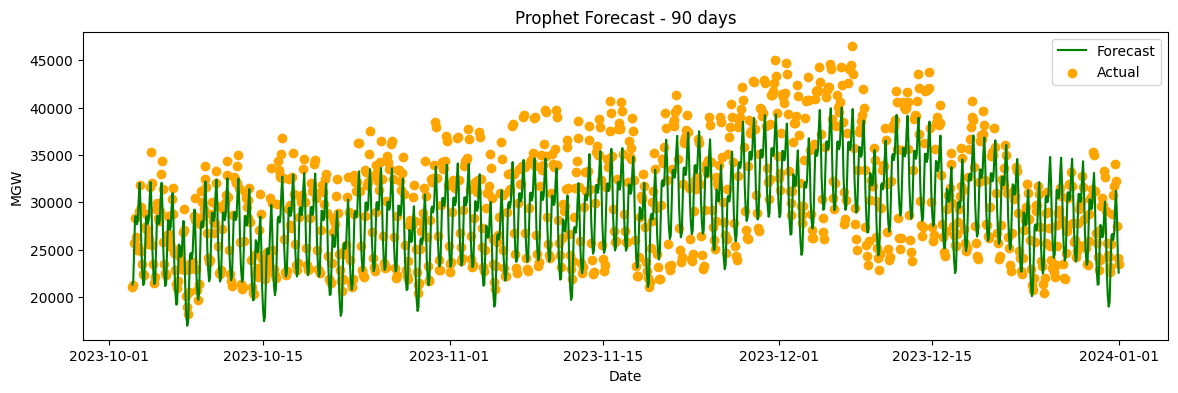

In [15]:
def forecast_plot(forecast_days,test_days, days):

  fig, ax = plt.subplots(figsize=(14, 4))
  ax.plot(forecast_days['ds'], forecast_days['yhat'], label='Forecast', color='green')
  ax.scatter(test_days['ds'], test_days['y'], label='Actual', color='orange')
  ax.set_xlabel('Date')
  ax.set_ylabel('MGW')
  plt.title(f'Prophet Forecast - {days} days')
  plt.legend()
  plt.show()

forecast_plot(forecast_days,test_days,days_to_predict)

In [16]:
mape_1 = mean_absolute_percentage_error(test_days["y"],forecast_days["yhat"])
rmse_1 = root_mean_squared_error(test_days["y"],forecast_days["yhat"])
rsqr_1 = r_squared(test_days["y"],forecast_days["yhat"])
print(f"MAPE without regressors: {round(mape_1,7)}")
print(f"RMSE without regressors: {round(rmse_1,7)}")
print(f"R-squared without regressors: {round(rsqr_1,7)}")

MAPE without regressors: 0.0752567
RMSE without regressors: 3000.6472249
R-squared without regressors: 0.7408507


training model_2, additional holidays

In [17]:
m2 = Prophet(mcmc_samples=mcmc_samples, changepoint_prior_scale=changepoint_prior_scale, seasonality_prior_scale=seasonality_prior_scale)
m2.add_country_holidays(country_name="UK")
m2.fit(train_data)

future_2 = m2.make_future_dataframe(periods=periods , freq=freq)
forecast2 = m2.predict(future_2)
forecast2

DEBUG:cmdstanpy:cmd: /usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbphi4jc_/zk_a0bwl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbphi4jc_/ls95tunc.json
17:08:56 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=84294', 'data', 'file=/tmp/tmpbphi4jc_/zk_a0bwl.json', 'init=/tmp/tmpbphi4jc_/ls95tunc.json', 'output', 'file=/tmp/tmpbphi4jc_/prophet_model8r7ift4b/prophet_model-20240429170856_2.csv', 'method=sample', 'num_samples=25', 'num_warmup=25', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=84294', 'data', 'file=/tmp/tmpbphi4jc_/zk_a0bwl.json', 'init=/tmp/tmpbphi4jc_/ls95tunc.json', 'output', 'file=/tmp/tmpbphi4jc_/prophet_model8r7ift4b/prophet_model-20240429170856_1.csv', 'method=sample', 'num_samples=25', 'num_warmup=25', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanp

17:11:12 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=84294', 'data', 'file=/tmp/tmpbphi4jc_/zk_a0bwl.json', 'init=/tmp/tmpbphi4jc_/ls95tunc.json', 'output', 'file=/tmp/tmpbphi4jc_/prophet_model8r7ift4b/prophet_model-20240429170856_1.csv', 'method=sample', 'num_samples=25', 'num_warmup=25', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpbphi4jc_/prophet_model8r7ift4b/prophet_model-20240429170856_1.csv
 console_msgs (if any):
	/tmp/tmpbphi4jc_/prophet_model8r7ift4b/prophet_model-20240429170856_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 25
    num_warmup = 25
    save_warmup = 0 (Default)
    thin = 1 (Default)


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Boxing Day,Boxing Day_lower,Boxing Day_upper,Boxing Day (observed),...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-01-01 00:00:00,30622.962742,23611.517452,31377.836319,30206.268670,31228.714310,0.0,0.0,0.0,0.0,...,1067.604188,960.680006,1160.805651,1934.066564,1414.072301,2437.860392,0.0,0.0,0.0,27424.117771
1,2021-01-01 02:00:00,30621.759419,22427.918298,29687.397241,30205.799077,31226.602600,0.0,0.0,0.0,0.0,...,1022.395567,917.563858,1116.300134,1939.098263,1419.905007,2441.390173,0.0,0.0,0.0,26192.044753
2,2021-01-01 04:00:00,30620.556097,22716.791461,30344.503487,30205.329484,31224.490889,0.0,0.0,0.0,0.0,...,964.479676,872.789289,1062.884581,1944.424757,1426.059180,2445.193429,0.0,0.0,0.0,26521.639765
3,2021-01-01 06:00:00,30619.352775,26017.104460,33781.701221,30204.859891,31222.379179,0.0,0.0,0.0,0.0,...,891.219463,808.306963,994.828489,1950.045232,1432.533896,2449.269350,0.0,0.0,0.0,30070.716087
4,2021-01-01 08:00:00,30618.149452,29184.877178,36933.919750,30204.390298,31220.267468,0.0,0.0,0.0,0.0,...,800.096545,722.466718,895.559313,1955.958829,1439.328189,2453.521089,0.0,0.0,0.0,33167.227555
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13136,2023-12-31 16:00:00,26483.900077,25823.700908,34292.165252,25921.746979,27126.307309,0.0,0.0,0.0,0.0,...,-2089.945774,-2170.870100,-2003.937618,1895.778502,1367.840218,2414.244774,0.0,0.0,0.0,30093.958603
13137,2023-12-31 18:00:00,26483.318985,27949.501725,35941.700709,25920.250678,27125.933212,0.0,0.0,0.0,0.0,...,-1789.959068,-1867.420022,-1711.062672,1896.922039,1369.429968,2414.759549,0.0,0.0,0.0,32027.447327
13138,2023-12-31 20:00:00,26482.737893,25420.175432,33592.359179,25918.754377,27125.559115,0.0,0.0,0.0,0.0,...,-1476.934097,-1554.423429,-1399.460973,1898.367286,1371.349156,2415.555391,0.0,0.0,0.0,29559.530455
13139,2023-12-31 22:00:00,26482.156801,21427.652116,29474.726580,25917.258076,27125.185018,0.0,0.0,0.0,0.0,...,-1157.948451,-1233.860013,-1080.980257,1900.113955,1373.597437,2416.632036,0.0,0.0,0.0,25306.986241


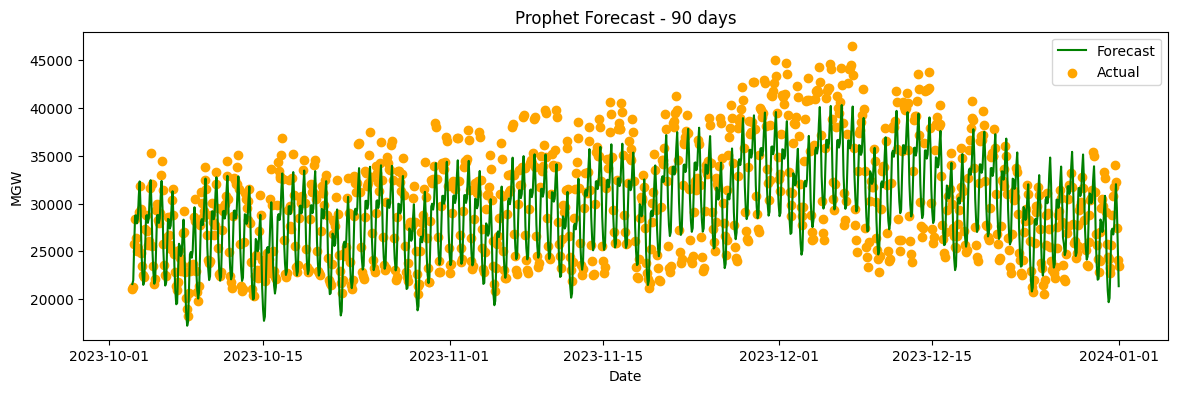

In [18]:
forecast2__days = forecast2[forecast2 ["ds"] >= test_data["ds"].iloc[0]]
forecast_plot(forecast2__days,test_days,days_to_predict)

In [19]:
mape_2 = mean_absolute_percentage_error(test_days["y"],forecast2__days["yhat"])
rmse_2 = root_mean_squared_error(test_days["y"],forecast2__days["yhat"])
rsqr_2 = r_squared(test_days["y"],forecast2__days["yhat"])
print(f"MAPE holidays added: {round(mape_2,7)}")
print(f"RMSE holidays added: {round(rmse_2,7)}")
print(f"R-squared holidays added: {round(rsqr_2,7)}")

MAPE holidays added: 0.0721385
RMSE holidays added: 2828.2700808
R-squared holidays added: 0.76977


model 3 holiday+weather data

In [20]:
df_model_3 = df_merged[["tsd","settlement_date","temp"]]
df_model_3.columns=["y","ds","temp"]
df_model_3

,y,ds,temp
0,28552.00,2021-01-01 00:00:00,1.55
1,26579.75,2021-01-01 02:00:00,1.60
2,25236.00,2021-01-01 04:00:00,0.55
3,25792.25,2021-01-01 06:00:00,-0.35
4,28162.75,2021-01-01 08:00:00,-0.10
...,...,...,...
13136,34006.00,2023-12-31 16:00:00,7.60
13137,32273.00,2023-12-31 18:00:00,8.20
13138,27456.50,2023-12-31 20:00:00,8.45
13139,24139.25,2023-12-31 22:00:00,8.35


In [21]:
train_data_3 = df_model_3[:-split_from]
test_data_3 = df_model_3[-split_from:]

In [22]:
m3= Prophet(mcmc_samples=mcmc_samples, changepoint_prior_scale=changepoint_prior_scale, seasonality_prior_scale=seasonality_prior_scale)
m3.add_country_holidays(country_name="UK")
m3.add_regressor("temp", mode="additive")
m3.fit(train_data_3)
future3 = m3.make_future_dataframe(periods=periods, freq=freq)

DEBUG:cmdstanpy:cmd: /usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbphi4jc_/z4qfuvma.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbphi4jc_/kkys_b9q.json
17:11:19 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=47158', 'data', 'file=/tmp/tmpbphi4jc_/z4qfuvma.json', 'init=/tmp/tmpbphi4jc_/kkys_b9q.json', 'output', 'file=/tmp/tmpbphi4jc_/prophet_model_h4r5t5m/prophet_model-20240429171119_1.csv', 'method=sample', 'num_samples=25', 'num_warmup=25', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=47158', 'data', 'file=/tmp/tmpbphi4jc_/z4qfuvma.json', 'init=/tmp/tmpbphi4jc_/kkys_b9q.json', 'output', 'file=/tmp/tmpbphi4jc_/prophet_model_h4r5t5m/prophet_model-20240429171119_2.csv', 'method=sample', 'num_samples=25', 'num_warmup=25', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanp

17:13:09 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=47158', 'data', 'file=/tmp/tmpbphi4jc_/z4qfuvma.json', 'init=/tmp/tmpbphi4jc_/kkys_b9q.json', 'output', 'file=/tmp/tmpbphi4jc_/prophet_model_h4r5t5m/prophet_model-20240429171119_1.csv', 'method=sample', 'num_samples=25', 'num_warmup=25', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpbphi4jc_/prophet_model_h4r5t5m/prophet_model-20240429171119_1.csv
 console_msgs (if any):
	/tmp/tmpbphi4jc_/prophet_model_h4r5t5m/prophet_model-20240429171119_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 25
    num_warmup = 25
    save_warmup = 0 (Default)
    thin = 1 (Default)


In [23]:
#create train and text idx which will be used to index future dataframe
train_idx = future3["ds"].isin(train_data_3.ds)
test_idx = ~train_idx
#add regressors to future dataframe
reg = ["temp"]
for r in reg:
  future3.loc[train_idx, r] = train_data_3[r].to_list()
for r in reg:
  future3.loc[test_idx, r] = test_data_3.iloc[:periods][r].to_list()
future3

,ds,temp
0,2021-01-01 00:00:00,1.55
1,2021-01-01 02:00:00,1.60
2,2021-01-01 04:00:00,0.55
3,2021-01-01 06:00:00,-0.35
4,2021-01-01 08:00:00,-0.10
...,...,...
13136,2023-12-31 16:00:00,7.60
13137,2023-12-31 18:00:00,8.20
13138,2023-12-31 20:00:00,8.45
13139,2023-12-31 22:00:00,8.35


In [24]:
forecast3 = m3.predict(future3)
forecast3

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Boxing Day,Boxing Day_lower,Boxing Day_upper,Boxing Day (observed),...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-01-01 00:00:00,29927.517260,24653.430198,34764.057533,29271.881440,30411.148755,0.0,0.0,0.0,0.0,...,1069.842414,943.970278,1182.097349,803.584083,9.376943,2031.276951,0.0,0.0,0.0,29471.151106
1,2021-01-01 02:00:00,29926.893498,23299.300575,33709.581030,29270.769736,30410.579999,0.0,0.0,0.0,0.0,...,1011.663108,886.187000,1103.714477,806.658507,12.713936,2032.133848,0.0,0.0,0.0,28045.949057
2,2021-01-01 04:00:00,29926.269736,23133.359941,34001.432385,29269.658032,30410.011242,0.0,0.0,0.0,0.0,...,941.898760,820.885710,1041.991373,809.963245,16.321491,2034.085551,0.0,0.0,0.0,28558.254124
3,2021-01-01 06:00:00,29925.645974,27506.560084,37698.835666,29268.546328,30409.442486,0.0,0.0,0.0,0.0,...,858.188437,745.186015,945.665303,813.497782,20.199019,2036.761599,0.0,0.0,0.0,32287.286842
4,2021-01-01 08:00:00,29925.022212,30950.365276,41088.307884,29267.434624,30408.873730,0.0,0.0,0.0,0.0,...,758.239877,656.149495,836.303302,817.261569,24.345898,2039.626815,0.0,0.0,0.0,35571.993384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13136,2023-12-31 16:00:00,27011.593951,25728.247809,37033.311808,26027.835530,29464.123764,0.0,0.0,0.0,0.0,...,-2086.820324,-2160.853684,-2004.986196,784.751812,-9.186019,2018.818736,0.0,0.0,0.0,31700.279593
13137,2023-12-31 18:00:00,27011.219242,26983.573801,38578.501964,26027.374728,29464.311313,0.0,0.0,0.0,0.0,...,-1792.973783,-1862.546809,-1702.570909,784.799759,-9.402205,2018.645579,0.0,0.0,0.0,33199.747858
13138,2023-12-31 20:00:00,27010.844534,24469.451056,35485.479776,26026.913926,29464.604192,0.0,0.0,0.0,0.0,...,-1486.425507,-1551.728711,-1388.790107,785.081809,-9.343702,2018.663744,0.0,0.0,0.0,30303.317453
13139,2023-12-31 22:00:00,27010.469825,19328.357271,31371.127183,26026.453124,29464.942722,0.0,0.0,0.0,0.0,...,-1174.135508,-1260.858943,-1086.143846,785.597864,-9.010598,2018.873253,0.0,0.0,0.0,25796.586998


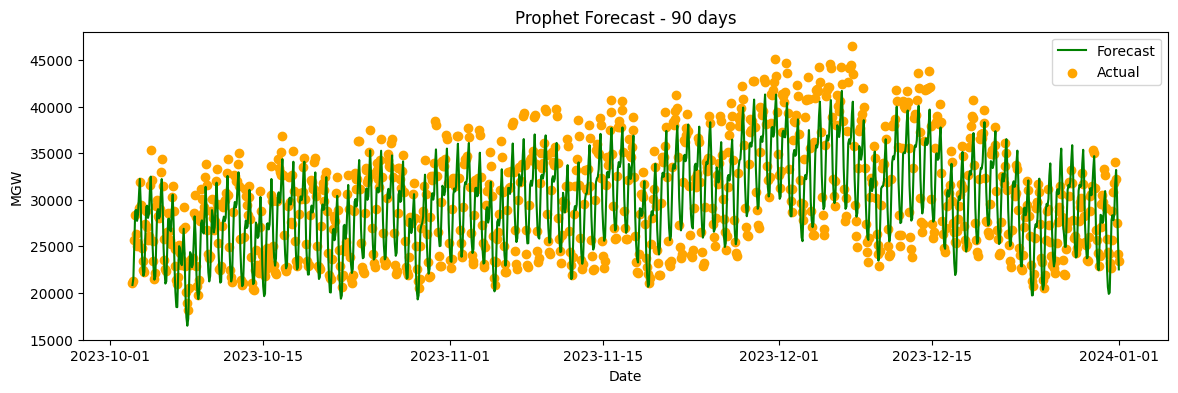

In [25]:
forecast3_days = forecast3[forecast3["ds"] >= test_data_3["ds"].iloc[0]]
test3_days = test_data_3[(test_data_3["ds"] >= test_data_3["ds"].iloc[0])&(test_data_3["ds"] <= forecast3_days["ds"].iloc[-1])]
forecast_plot(forecast3_days,test3_days,days_to_predict)

In [26]:
mape_3 = mean_absolute_percentage_error(test3_days["y"],forecast3_days["yhat"])
rmse_3 = root_mean_squared_error(test3_days["y"],forecast3_days["yhat"])
rsqr_3 = r_squared(test3_days["y"],forecast3_days["yhat"])
print(f"MAPE holidays+weather added: {round(mape_3,7)}")
print(f"RMSE holidays+weather added: {round(rmse_3,7)}")
print(f"R-squared holidays+weather added: {round(rsqr_3,7)}")

MAPE holidays+weather added: 0.063924
RMSE holidays+weather added: 2445.7938568
R-squared holidays+weather added: 0.8278291


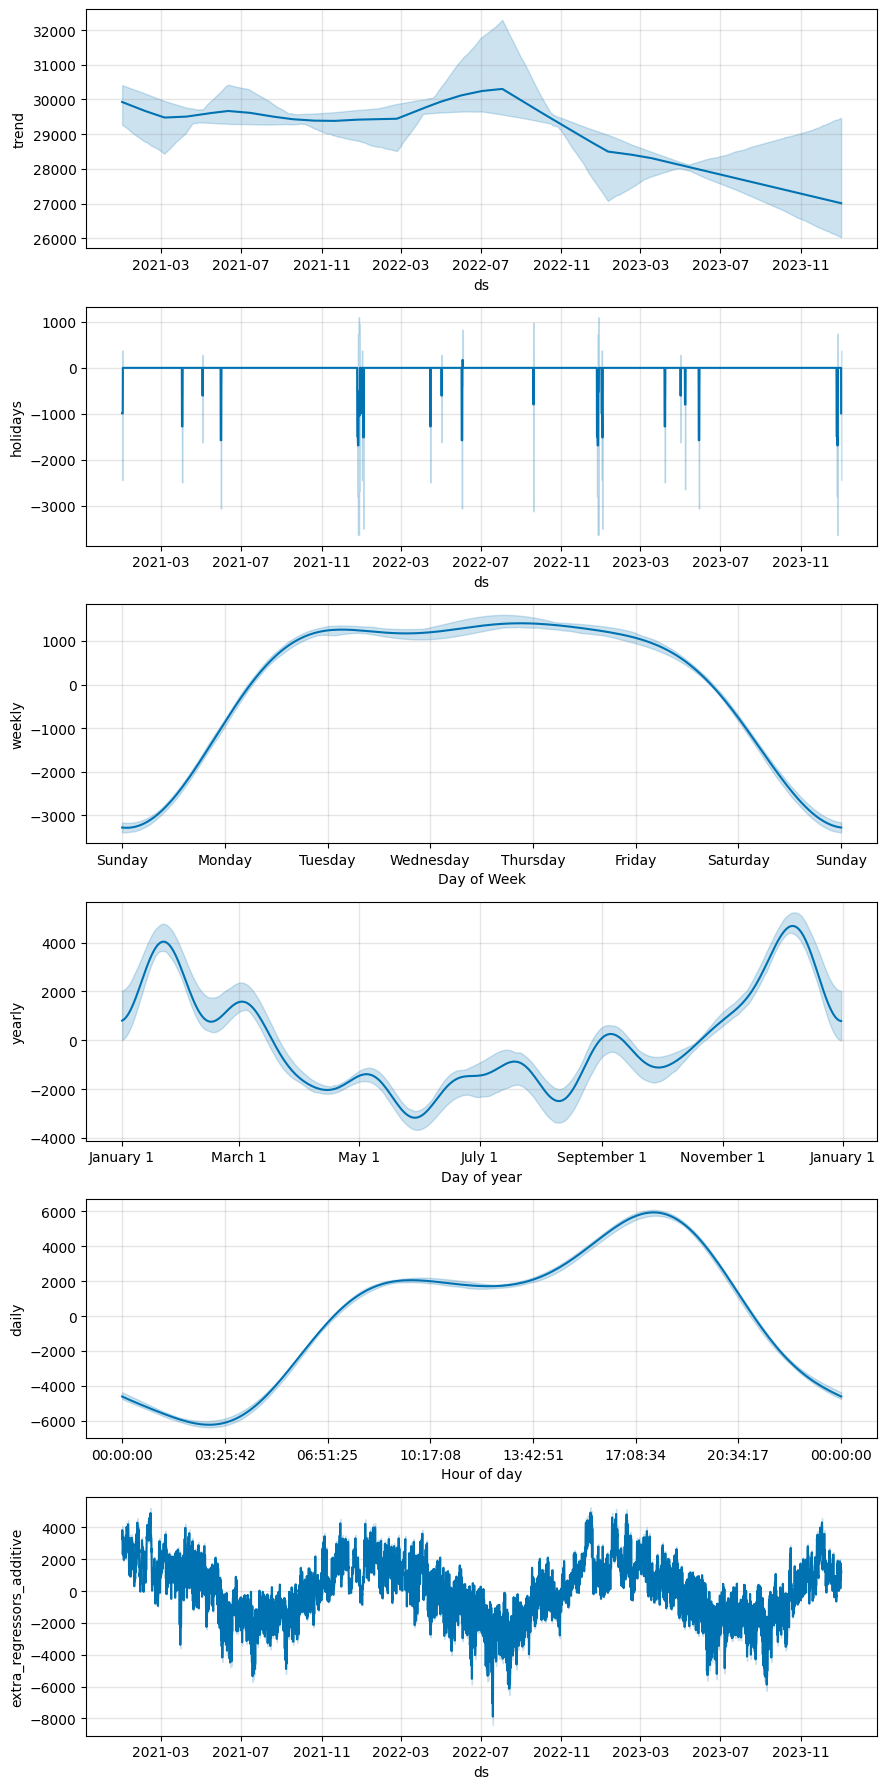

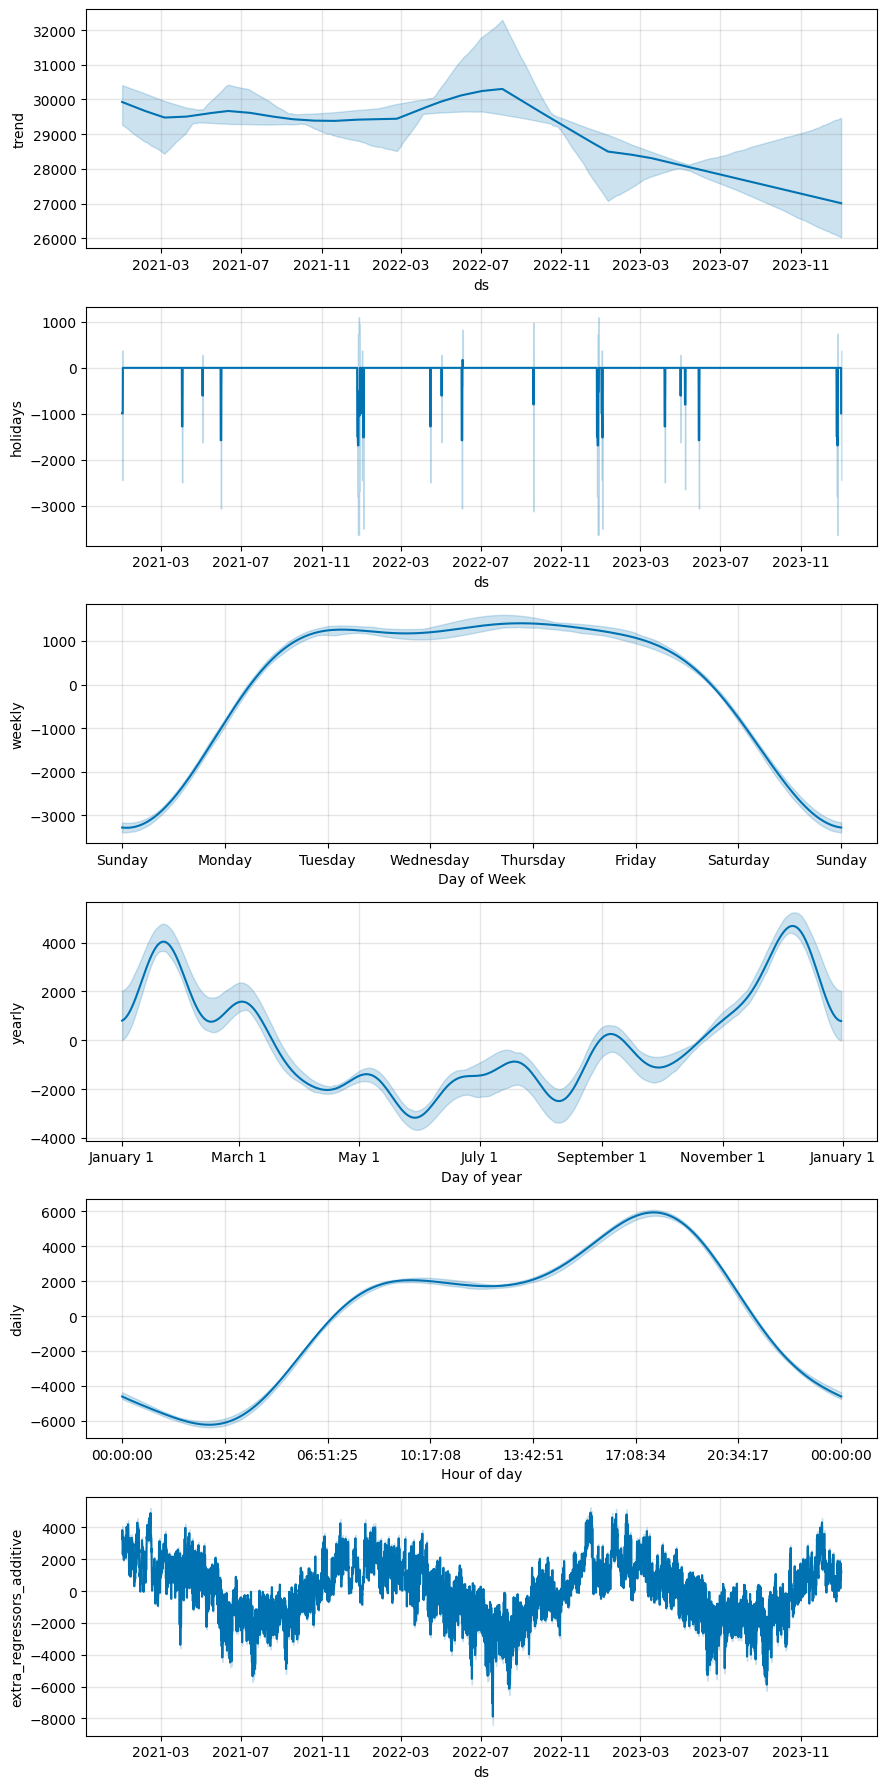

In [27]:
m3.plot_components(forecast3)